<a href="https://colab.research.google.com/github/forde1909/UL/blob/main/Tutorial_2_Clustering_and_Manifold_Learning(draft_Etivity_a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
####################################################
# Python Program                                   #
#                                                  #
# Name: Joseph Forde                               #
# Student ID Number: 24514128                      #
# CS5062 – Data Analytics                          #
# E-tivity 2                                       #
# Task 1: Data Preparation Pipeline                #
# Task 2: k-Means                                  #
# Task 3: DBSCAN                                   #
# https://github.com/forde1909/UL                  #
# Data set:- Bank.csv                              #
# Date 13-04-2025                                  #
####################################################

Python Version been used

In [2]:
!python --version

Python 3.11.11


# Tutorial 2: Clustering and Manifold Learning

Practice techniques for discovering and visualising hidden patterns in data.  Introduce scikit-learn pipelines as a tool for implementing the data preparation

Task 1: Data Preparation Pipeline                
Task 2: k-Means                                  
Task 3: DBSCAN                                   
Notebook also available at: https://github.com/forde1909/UL/E-tivity-2


### A. Import Python Modules and Dataset

---



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn.preprocessing import OneHotEncoder,  MinMaxScaler, StandardScaler, RobustScaler, FunctionTransformer #needed for data preparation

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#### Load the dataset

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/UL/E-tivity-2/bank.csv')

print('(number of examples, number of attributes): ', df.shape)
# You can also open Bank.csv with Excel and take a look at it.

(number of examples, number of attributes):  (2000, 17)


### B. Exploratory Data Analysis

---



In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [7]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


The dataset consists of 150 data rows and 4 numerical columns, which represent the dimensions of iris flowers. There are no missing values. In the original dataset, each data row is labelled. The label is the species, and there are three species in the dataset: iris setosa, iris versicolor and iris virginica.

Let's check the distribution of the numerical attributes.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

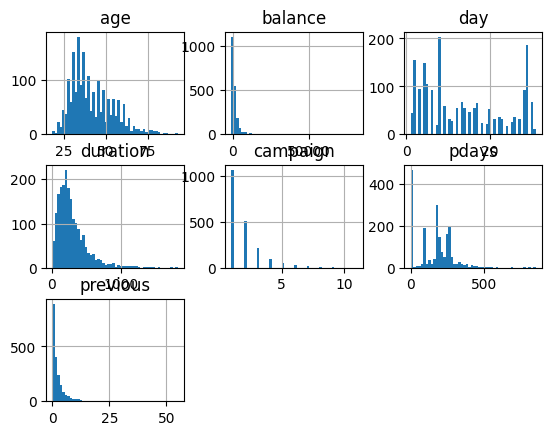

In [9]:
df.hist(bins=50)

<Axes: >

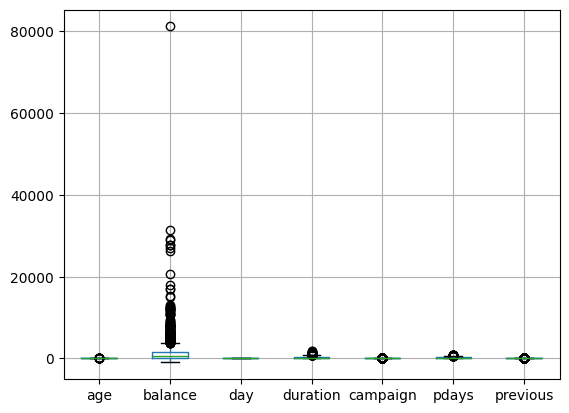

In [10]:
df.boxplot()

### C. Data Preparation

---



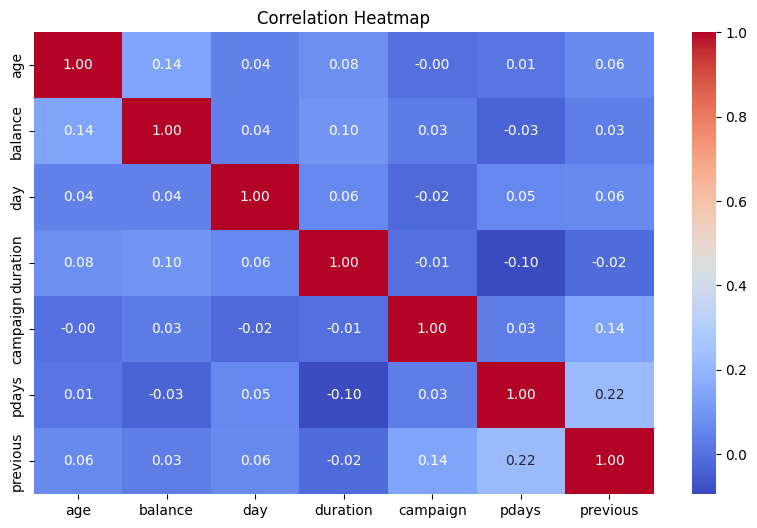

In [11]:
# Data cleaning
missing = df.isnull().sum()

# Summary stats
summary_stats = df.describe(include='all')

# Target distribution
target_dist = df['subscribed'].value_counts()

# Plot target distribution
#plt.figure(figsize=(6,4))
#sns.countplot(data=df, x='subscribed')
#plt.title("Subscription Distribution")
#plt.xlabel("Subscribed")
#plt.ylabel("Count")
#plt.show()

# Correlation heatmap (for numerical features only)
numerical_features = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()




In general, clustering algorithms benefit from standardising the data. In this case, we can apply MinMaxScaler or StandardScaler to the three columns without outliers and RobustScaler to petallength. We can also apply log transformation to petallength and petalwidth which appear skewed to the left.

We will do this by constructing a scikit-learn pipeline for data preparation (preprocess_pipeline). Pipelines make it easier to explore various options for the data preparation step and tune hyperparameters. In this e-tivity we will only use a pipeline as a more structured approach to data preparation.


### D. Separate Column Types into numerical & Categorical

---



In [12]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Target Variable Visualization

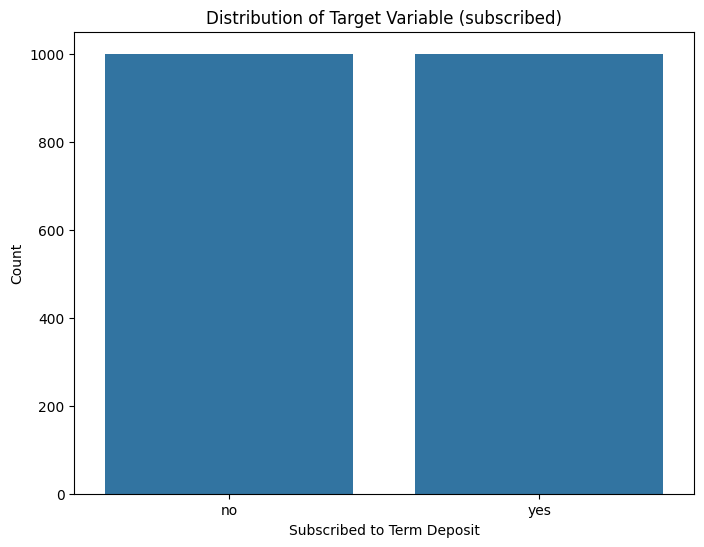

Target variable distribution:
subscribed
no     1000
yes    1000
Name: count, dtype: int64
Percentage of 'yes': 50.0 %


In [13]:
# Step 3: Examine the target variable distribution
plt.figure(figsize=(8, 6))
subscription_counts = df['subscribed'].value_counts()
sns.barplot(x=subscription_counts.index, y=subscription_counts.values)
plt.title('Distribution of Target Variable (subscribed)')
plt.ylabel('Count')
plt.xlabel('Subscribed to Term Deposit')
plt.show()

print("Target variable distribution:")
print(df['subscribed'].value_counts())
print("Percentage of 'yes':", round(df['subscribed'].value_counts(normalize=True)['yes'] * 100, 2), "%")


### E. Define the Data Preparation Pipeline and create a function for the

---

Pipeline  

In [14]:
def prepare_data(df):
    # Create a copy of the dataframe
    df_processed = df.copy()

Define the Data Preparation Pipeline

Create a function that:

*  Handles missing data
*  Treats outliers
*   Adds engineered features
*   Encodes the target variable


Feature engineering, anomaly detection and customer segmentation

*   Fill missing numerical values with median
*   Fill missing Categorical values with mode



In [15]:
# Step 1: Copy the cleaned dataframe
df_cleaned = df.copy()

# Step 2: Feature Engineering
# Convert categorical variables to dummy/encoded variables
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Fill missing numerical values with median
# df_encoded['age'].fillna(df_encoded['age'].median(), inplace=True)
df_encoded['age'] = df_encoded['age'].fillna(df_encoded['age'].median())
df_encoded['education_secondary'] = df_encoded['education_secondary'].fillna(0)
df_encoded['education_tertiary'] = df_encoded['education_tertiary'].fillna(0)

# Drop any remaining NA values (non-numerical columns will have been encoded or dropped)
df_encoded.dropna(inplace=True)

# Step 3: Anomaly Detection using Isolation Forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_encoded['anomaly'] = iso_forest.fit_predict(df_encoded.drop(columns=['subscribed_yes'], errors='ignore'))

# Step 4: Customer Segmentation using KMeans Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop(columns=['anomaly'], errors='ignore'))

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['segment'] = kmeans.fit_predict(X_scaled)

# Output a sample
df_encoded[['anomaly', 'segment']].value_counts().reset_index()


,anomaly,segment,count
0,1,2,669
1,1,1,552
2,1,3,436
3,1,0,243
4,-1,3,44
5,-1,1,40
6,-1,2,14
7,-1,0,2


Data Preparation Pipeline  

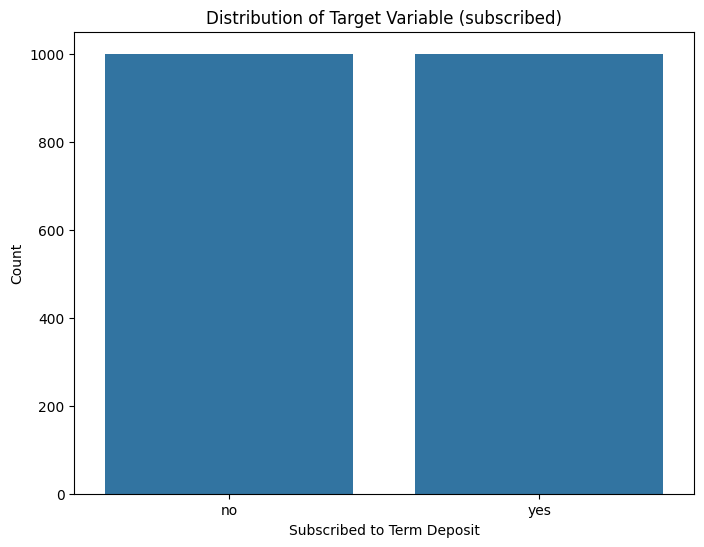

Target variable distribution:
subscribed
no     1000
yes    1000
Name: count, dtype: int64
Percentage of 'yes': 50.0 %


In [16]:

# Step 1: Separate numerical and categorical columns
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'poutcome']

# Step 2: Examine the target variable distribution
plt.figure(figsize=(8, 6))
subscription_counts = df['subscribed'].value_counts()
sns.barplot(x=subscription_counts.index, y=subscription_counts.values)
plt.title('Distribution of Target Variable (subscribed)')
plt.ylabel('Count')
plt.xlabel('Subscribed to Term Deposit')
plt.show()

print("Target variable distribution:")
print(df['subscribed'].value_counts())
print("Percentage of 'yes':", round(df['subscribed'].value_counts(normalize=True)['yes'] * 100, 2), "%")

# Step 3: Create a function for the data preparation pipeline
def prepare_data(df):
    # Create a copy of the dataframe
    df_processed = df.copy()

    # 3.1 Handle missing values
    print("\nHandling missing values...")

    # For numerical columns: impute with median
    for col in numerical_cols:
        if df_processed[col].isnull().sum() > 0:
            median_val = df_processed[col].median()
            df_processed[col] = df_processed[col].fillna(median_val)
            print("Imputed " + col + " with median value: " + str(median_val))

    # For categorical columns: impute with mode
    for col in categorical_cols:
        if df_processed[col].isnull().sum() > 0:
            mode_val = df_processed[col].mode()[0]
            df_processed[col] = df_processed[col].fillna(mode_val)
            print("Imputed " + col + " with mode value: '" + str(mode_val) + "'")

    # 3.2 Handle outliers in numerical columns (using capping)
    print("\nHandling outliers...")
    for col in numerical_cols:
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers_count = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)).sum()

        if outliers_count > 0:
            # Cap the outliers
            df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)
            print("Capped " + str(outliers_count) + " outliers in " + col)

    # 3.3 Feature Engineering
    print("\nPerforming feature engineering...")

    # Age groups
    df_processed['age_group'] = pd.cut(df_processed['age'],
                                      bins=[0, 30, 40, 50, 60, 100],
                                      labels=['<30', '30-40', '40-50', '50-60', '60+'])
    print("Created 'age_group' feature")

    # Balance categories
    df_processed['balance_category'] = pd.qcut(df_processed['balance'],
                                             q=4,
                                             labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
    print("Created 'balance_category' feature")

    # Duration in minutes (original is in seconds)
    df_processed['duration_min'] = df_processed['duration'] / 60
    print("Created 'duration_min' feature")

    # Has previous contact (based on 'previous' column)
    df_processed['has_previous_contact'] = (df_processed['previous'] > 0).astype(int)
    print("Created 'has_previous_contact' feature")

    # Season from month
    season_map = {
        'dec': 'winter', 'jan': 'winter', 'feb': 'winter',
        'mar': 'spring', 'apr': 'spring', 'may': 'spring',
        'jun': 'summer', 'jul': 'summer', 'aug': 'summer',
        'sep': 'fall', 'oct': 'fall', 'nov': 'fall'
    }
    df_processed['season'] = df_processed['month'].map(season_map)
    print("Created 'season' feature")

    # 3.4 Encode the target variable
    df_processed['subscribed_encoded'] = df_processed['subscribed'].map({'no': 0, 'yes': 1})
    print("Encoded target variable 'subscribed'")

    return df_processed



Apply the data preparation pipeline

In [17]:
df_processed = prepare_data(df)

# Display the processed dataframe
print("\nProcessed dataframe shape:", df_processed.shape)
print("\nNew features added:")
new_features = ['age_group', 'balance_category', 'duration_min', 'has_previous_contact', 'season', 'subscribed_encoded']
print(df_processed[new_features].head())

# Check if there are any remaining missing values
print("\nRemaining missing values:")
print(df_processed.isnull().sum().sum())



Handling missing values...
Imputed age with median value: 38.0
Imputed job with mode value: 'management'
Imputed education with mode value: 'secondary'
Imputed contact with mode value: 'cellular'
Imputed poutcome with mode value: 'failure'

Handling outliers...
Capped 24 outliers in age
Capped 158 outliers in balance
Capped 92 outliers in duration
Capped 212 outliers in campaign
Capped 33 outliers in pdays
Capped 169 outliers in previous

Performing feature engineering...
Created 'age_group' feature
Created 'balance_category' feature
Created 'duration_min' feature
Created 'has_previous_contact' feature
Created 'season' feature
Encoded target variable 'subscribed'

Processed dataframe shape: (2000, 23)

New features added:
  age_group balance_category  duration_min  has_previous_contact  season  \
0     30-40       Medium-Low     12.141667                     1  spring   
1     30-40      Medium-High      3.883333                     1  spring   
2     50-60      Medium-High      2.100

Save the processed dataframe

In [18]:
df_encoded.to_csv('/content/bank_processed.csv', index=False)

# download
from google.colab import files
files.download('/content/bank_processed.csv')
print("\nProcessed data saved to 'bank_processed.csv'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Processed data saved to 'bank_processed.csv'


# F. Visualize Of The New Features

---



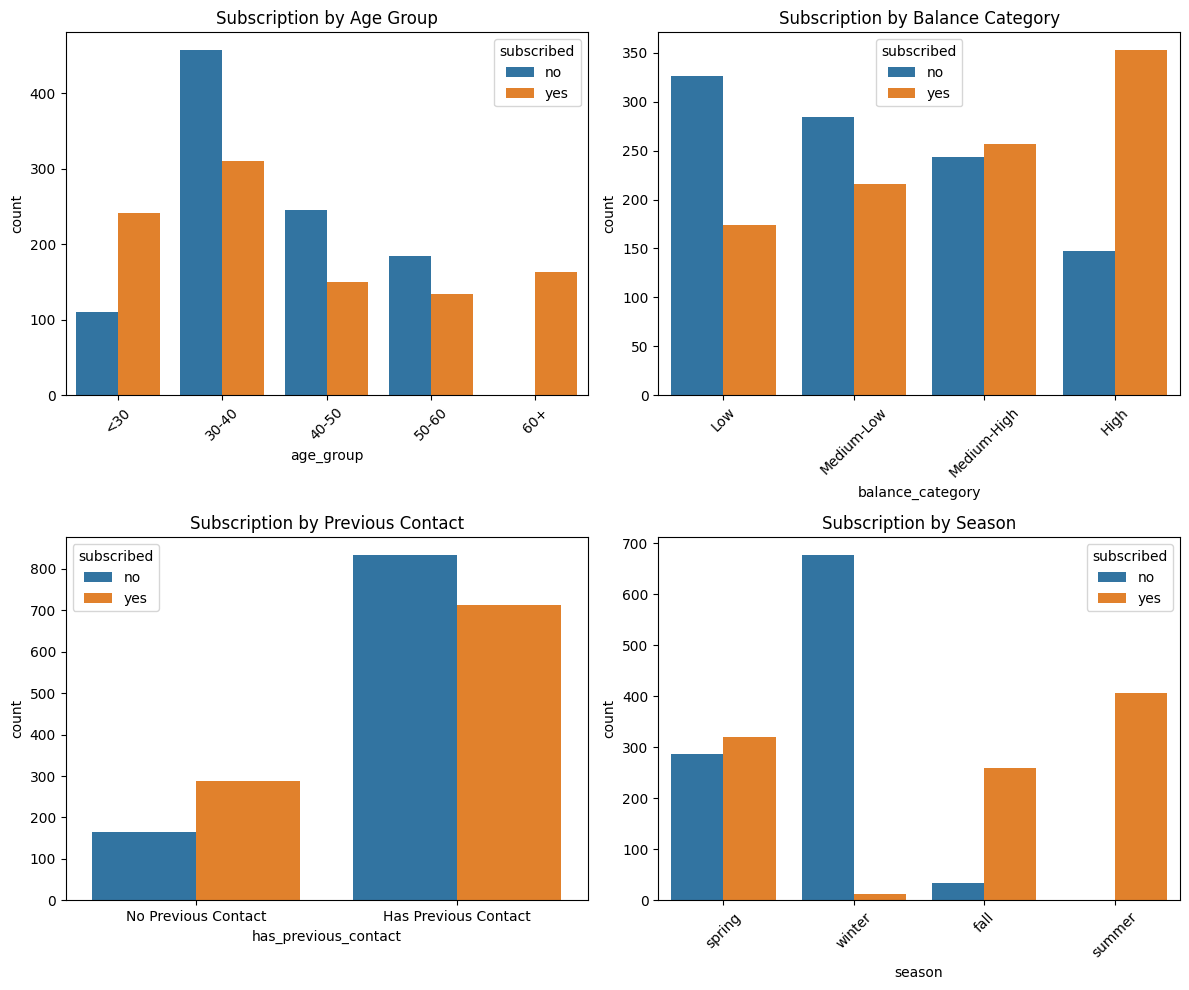

Data preparation pipeline completed successfully!


In [19]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='age_group', hue='subscribed', data=df_processed)
plt.title('Subscription by Age Group')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(x='balance_category', hue='subscribed', data=df_processed)
plt.title('Subscription by Balance Category')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(x='has_previous_contact', hue='subscribed', data=df_processed)
plt.title('Subscription by Previous Contact')
plt.xticks([0, 1], ['No Previous Contact', 'Has Previous Contact'])

plt.subplot(2, 2, 4)
sns.countplot(x='season', hue='subscribed', data=df_processed)
plt.title('Subscription by Season')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Data preparation pipeline completed successfully!")

Scatterplot Function


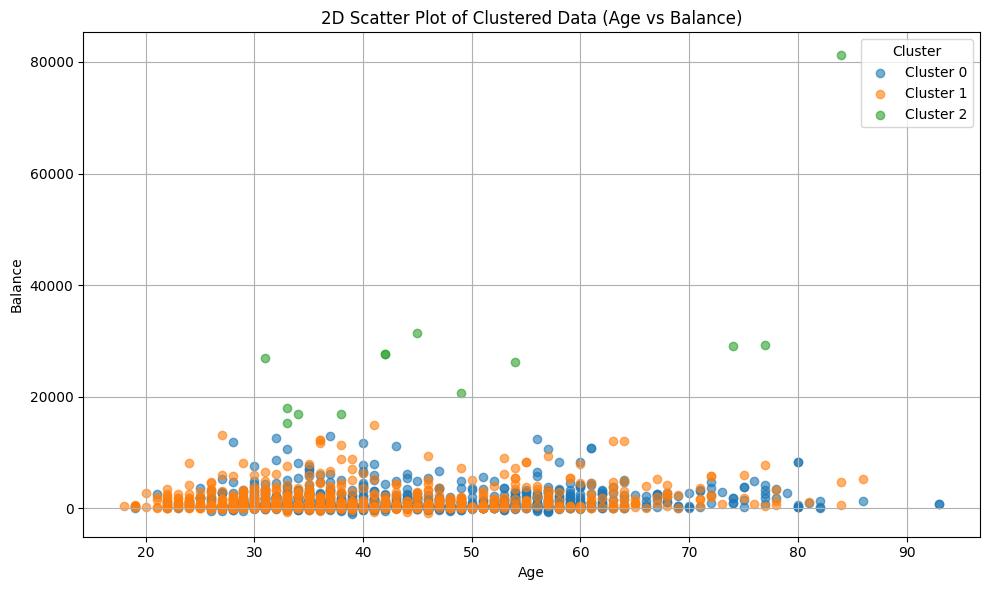

In [20]:
# Updated version of the user's code with the full set of features
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Use the expanded feature set
features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_cluster = df[features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels back to the dataframe
df_cluster['cluster'] = clusters

# 2D scatter plot of the clustered data using age vs balance
plt.figure(figsize=(10, 6))
for cluster_id in sorted(df_cluster['cluster'].unique()):
    subset = df_cluster[df_cluster['cluster'] == cluster_id]
    plt.scatter(subset['age'], subset['balance'], label=f'Cluster {cluster_id}', alpha=0.6)

plt.title('2D Scatter Plot of Clustered Data (Age vs Balance)')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


### G. K-Means Clustering

The k-Means clustering algorithm has the number of clusters $k$ as an input parameter __n_clusters__. We construct a final pipeline for training a k-Means clustering model for a fixed value of __n_clusters__ $=3$. The final pipeline has the preprocessing pipeline as its first step followed by the scikit-learn KMeans algorithm as a second step.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Define the preprocessing step (scaling)
preprocess_pipeline = StandardScaler()

# Number of clusters
k = 3

# Full pipeline: preprocessing + KMeans
pipe = Pipeline(steps=[
    ('preprocess', preprocess_pipeline),
    ('kMeans', KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42))
])

# Fit pipeline to data
#features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
#X = df[features].dropna()

#pipe.fit(X)

# Get cluster labels
#X['cluster'] = pipe.named_steps['kMeans'].labels_


Next, we fit the pipeline on the dataset to train a clustering model.

In [22]:
# Fit pipeline to data
features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
X = df[features].dropna()

pipe.fit(X)

# Get cluster labels
X['cluster'] = pipe.named_steps['kMeans'].labels_


In [23]:
X.groupby('cluster').mean()


,age,balance,duration,campaign,pdays,previous
cluster,,,,,,
0,55.150000,2842.271739,505.341304,1.671739,134.043478,2.658696
1,40.498182,1340.625455,234.821818,4.309091,206.138182,5.956364
2,37.110136,909.308859,226.318436,1.461293,171.862729,1.783719


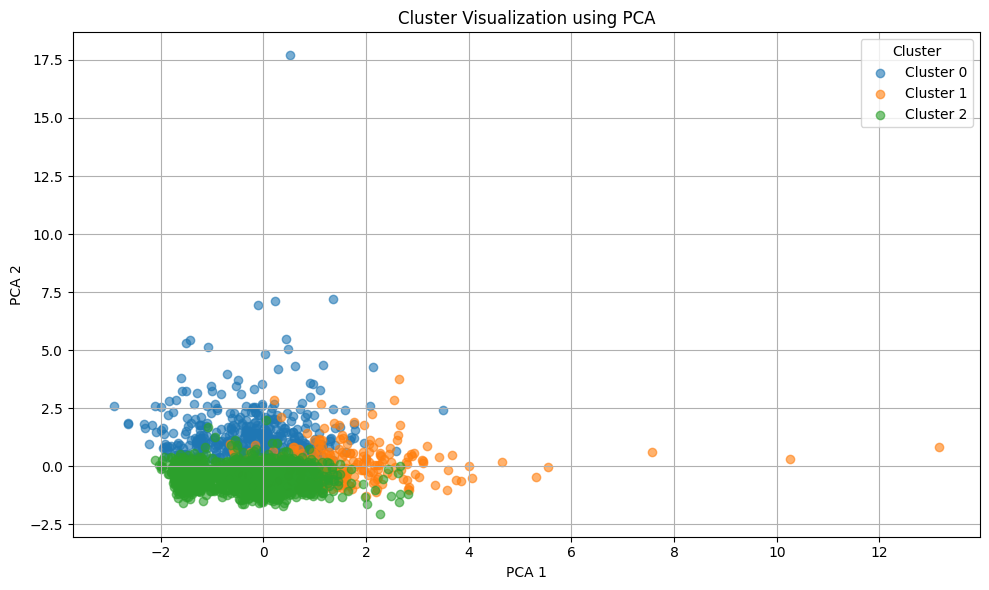

In [24]:
# Re-import libraries and re-define the pipeline due to environment reset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reload the dataset
#file_path = "/mnt/data/bank(2).csv"
#df = pd.read_csv(file_path)

# Define features and drop missing values
features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
X = df[features].dropna()

# Recreate the pipeline
pipeline = Pipeline(steps=[
    ('preprocess', StandardScaler()),
    ('kMeans', KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=42))
])

# Fit the pipeline
pipeline.fit(X)

# Assign cluster labels
X['cluster'] = pipeline.named_steps['kMeans'].labels_

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(pipeline.named_steps['preprocess'].transform(X.drop(columns='cluster')))
X['PCA1'] = components[:, 0]
X['PCA2'] = components[:, 1]

# Plot the clusters using PCA-reduced components
plt.figure(figsize=(10, 6))
for label in sorted(X['cluster'].unique()):
    subset = X[X['cluster'] == label]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {label}', alpha=0.6)

plt.title("Cluster Visualization using PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


Each color-coded point represents a client, and the clusters were formed using K-Means (k=3). The PCA projection helps us visualize multi-dimensional patterns in 2D.

Use the Elbow Method to determine the optimal number of clusters

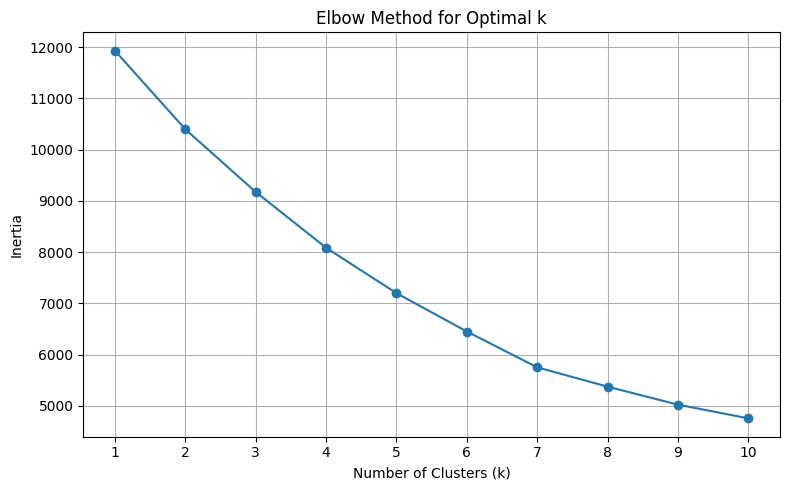

In [25]:
import numpy as np

# Range of k values to try
k_values = range(1, 11)
inertia_values = []

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[features])

# Run KMeans for each k and store the inertia (sum of squared distances to centroids)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


The "Elbow Point" is where the inertia curve starts to flatten.

In this case, the elbow appears around k = 3.

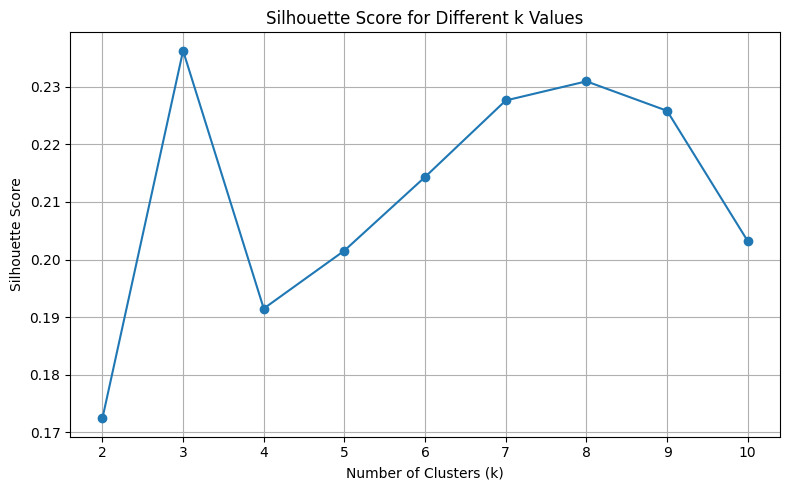

In [26]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for a range of k values
silhouette_scores = []

for k in range(2, 11):  # silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.tight_layout()
plt.show()


Higher silhouette scores indicate better-defined clusters.

In this case for the data bank.csv, the peak score appears around k = 3, confirming that 3 clusters provide a strong separation between groups.

This validates original choice of k=3 using both:
The "Elbow Point" is where the inertia curve starts
to flatten.

In this case, the elbow appears around k = 3


Use the best value(s) of k to cluster the prepared bank dataset with k-means. Aim at producing meaningful clustering.

# H. Apply the DBSCAN clustering algorithm to the prepared bank dataset

---



Cluster Summary:
                age      balance    duration  campaign       pdays  previous
cluster                                                                    
0        55.150000  2842.271739  505.341304  1.671739  134.043478  2.658696
1        40.498182  1340.625455  234.821818  4.309091  206.138182  5.956364
2        37.110136   909.308859  226.318436  1.461293  171.862729  1.783719


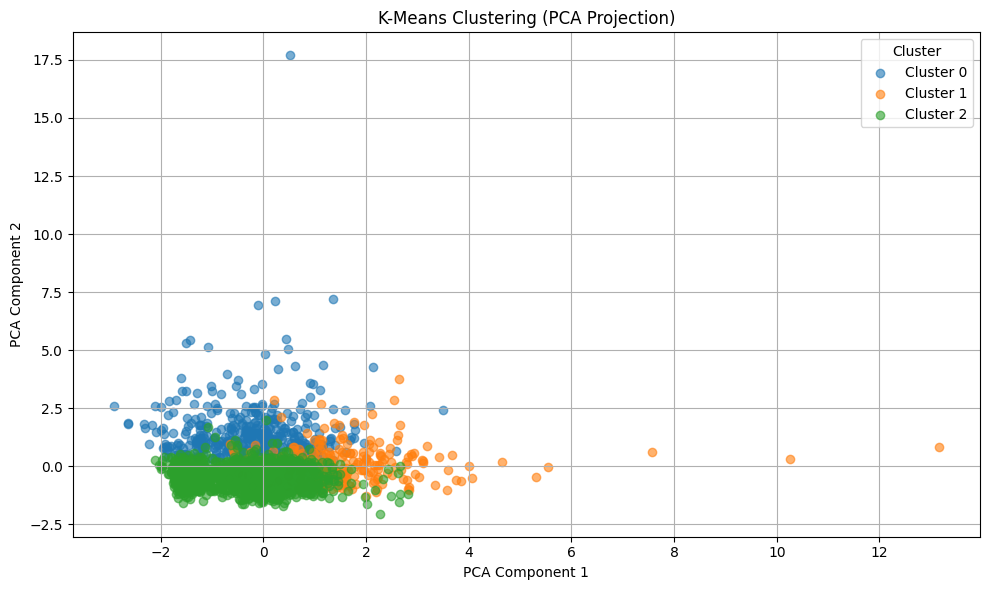

In [27]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Step 2: Load the dataset
#df = pd.read_csv('bank(2).csv')  # Change the path if needed

# Step 3: Select relevant features
features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
X = df[features].dropna()

# Step 4: Build and fit the pipeline (scaling + k-means with k=3)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=42))
])
pipeline.fit(X)

# Step 5: Assign cluster labels
X['cluster'] = pipeline.named_steps['kmeans'].labels_

# Step 6: Display cluster summary
cluster_summary = X.groupby('cluster').mean()
print("Cluster Summary:\n", cluster_summary)

# Step 7: Optional - Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(pipeline.named_steps['scaler'].transform(X[features]))
X['PCA1'] = X_pca[:, 0]
X['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
for label in sorted(X['cluster'].unique()):
    subset = X[X['cluster'] == label]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {label}', alpha=0.6)

plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


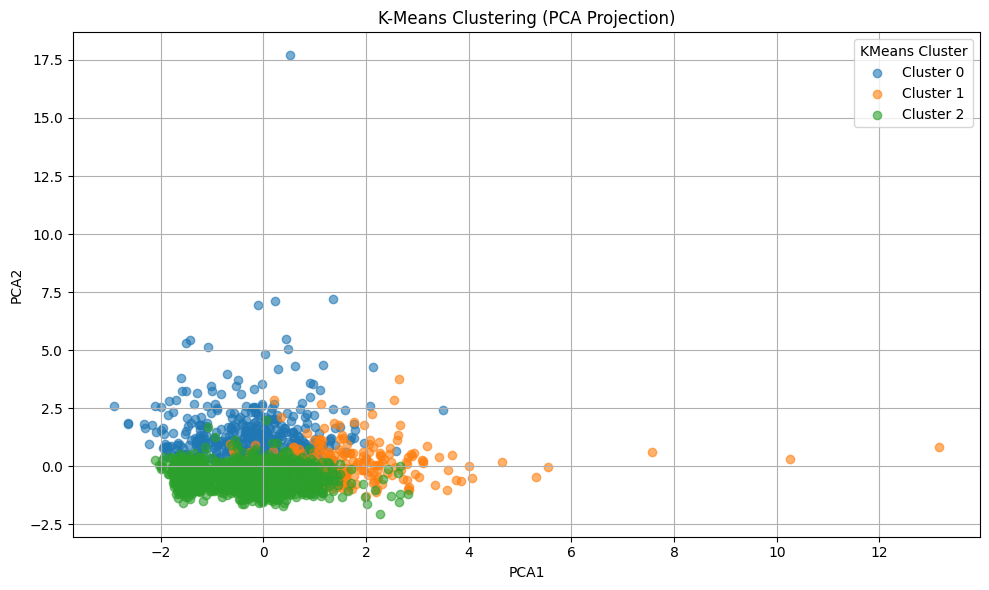

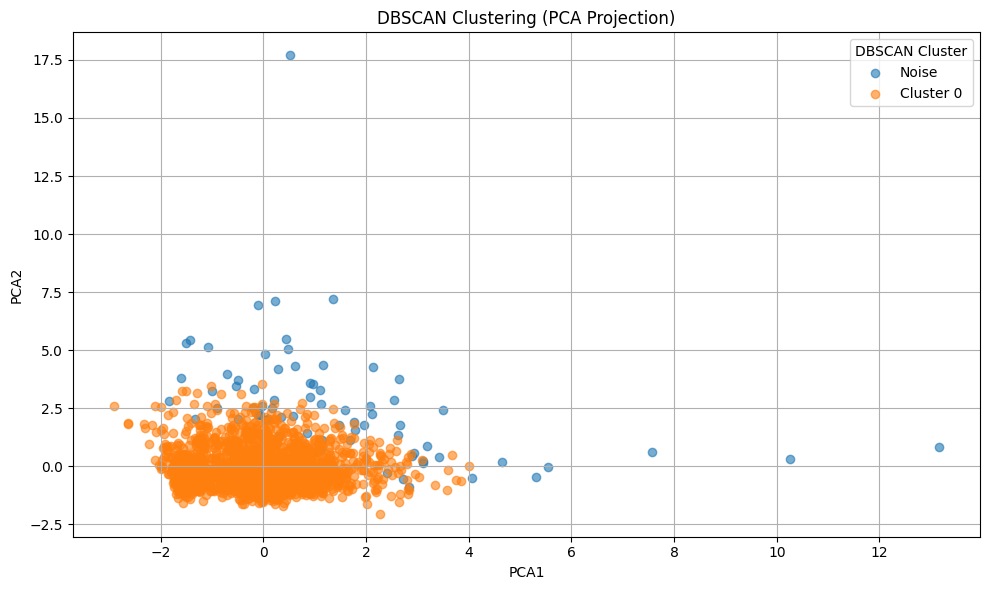

Clustered data saved as 'bank_clustered_output.csv'


In [28]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Step 2: Load dataset
#df = pd.read_csv('bank(2).csv')  # Update path if needed
features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
X = df[features].dropna()

# Step 3: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: K-Means clustering (k=3)
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
X['kmeans_cluster'] = kmeans_labels

# Step 5: DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
X['dbscan_cluster'] = dbscan_labels

# Step 6: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X['PCA1'] = X_pca[:, 0]
X['PCA2'] = X_pca[:, 1]

# Step 7: Visualize K-Means clusters
plt.figure(figsize=(10, 6))
for label in sorted(X['kmeans_cluster'].unique()):
    subset = X[X['kmeans_cluster'] == label]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {label}', alpha=0.6)
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="KMeans Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
for label in sorted(X['dbscan_cluster'].unique()):
    subset = X[X['dbscan_cluster'] == label]
    label_name = f"Noise" if label == -1 else f"Cluster {label}"
    plt.scatter(subset['PCA1'], subset['PCA2'], label=label_name, alpha=0.6)
plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="DBSCAN Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Save output to CSV
X.to_csv("bank_clustered_output.csv", index=False)
print("Clustered data saved as 'bank_clustered_output.csv'")


Use MDS and t-SNE for Visualising the Clusterings:

---



1;  MDS Visualising the Clusterings

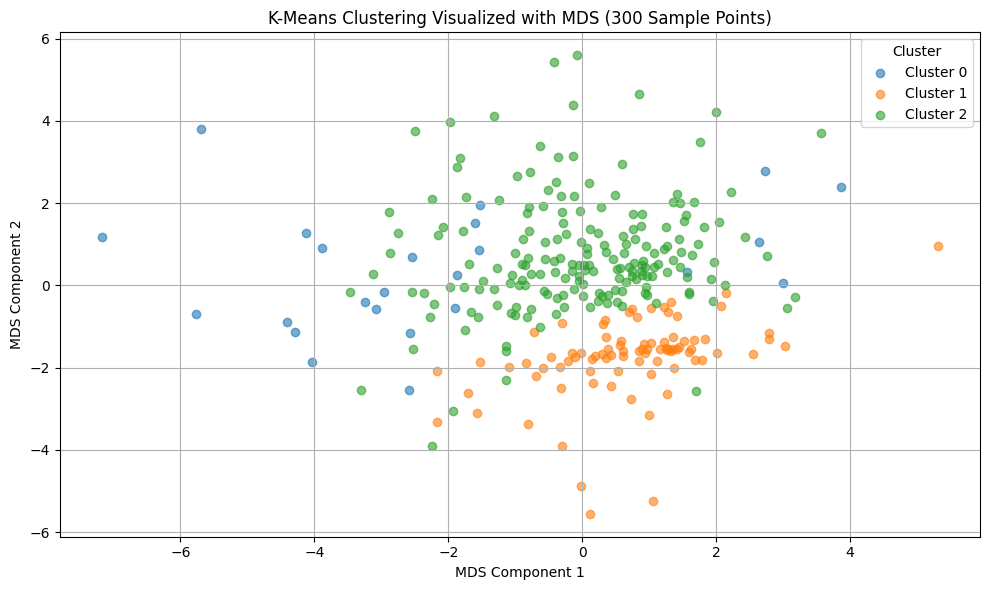

In [29]:
# Perform MDS only

from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Reload the dataset
#file_path = "/mnt/data/bank(2).csv"
#df = pd.read_csv(file_path)

# Select features and sample 300 rows
features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
X_sample = df[features].dropna().sample(n=300, random_state=42)

# Standardize the sample
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# Plot MDS result
plt.figure(figsize=(10, 6))
for label in sorted(set(labels)):
    plt.scatter(X_mds[labels == label, 0], X_mds[labels == label, 1],
                label=f'Cluster {label}', alpha=0.6)
plt.title("K-Means Clustering Visualized with MDS (300 Sample Points)")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


 2;  t-SNE for Visualising the Clusterings

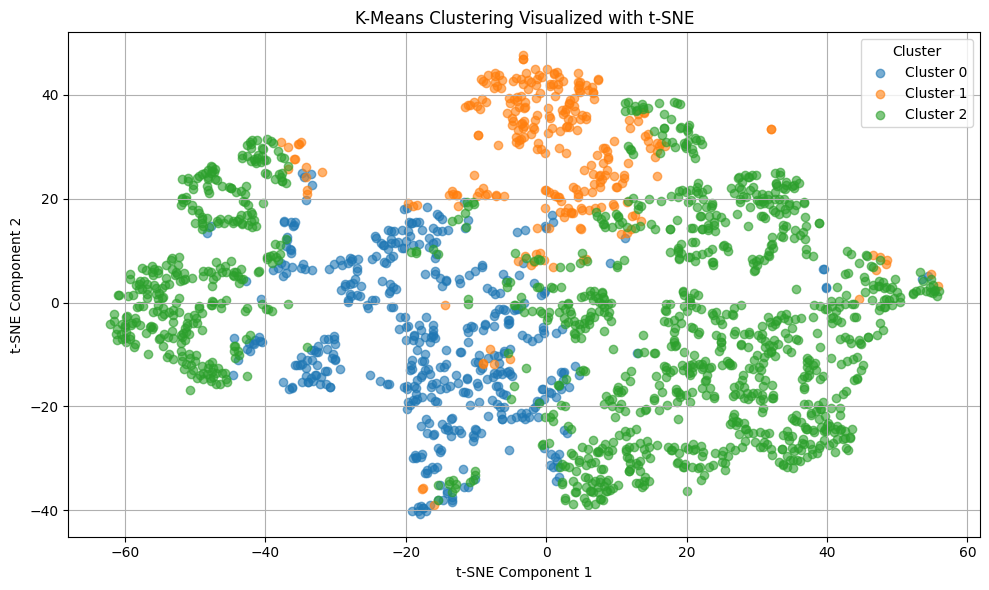

In [30]:
# Step 1: Import dependencies
#import pandas as pd
#import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import KMeans
#from sklearn.manifold import TSNE

# Step 2: Load and prepare data
#df = pd.read_csv('bank(2).csv')  # Replace with actual path if needed

# Perform t-SNE only
features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
X = df[features].dropna()

# Step 3: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: K-Means clustering
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=42)
X['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: t-SNE projection (2D)
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
X['TSNE1'] = X_tsne[:, 0]
X['TSNE2'] = X_tsne[:, 1]

# Step 6: Plot t-SNE clusters
plt.figure(figsize=(10, 6))
for label in sorted(X['kmeans_cluster'].unique()):
    subset = X[X['kmeans_cluster'] == label]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {label}', alpha=0.6)
plt.title("K-Means Clustering Visualized with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


# Conclusion:- Characteristics Of The Clusters

---



The K-Means clustering analysis, using an optimal value of k=3, revealed three distinct customer segments within the bank dataset. Cluster 0 consists primarily of older clients with high account balances and longer call durations, indicating a financially established group that may be more receptive to personalized financial products. Cluster 1 includes middle-aged clients with moderate balances who have been contacted frequently in past campaigns, suggesting a segment that may require persistent outreach and is potentially undecided or more cautious in their responses. Cluster 2 represents a younger demographic with lower balances, fewer past interactions, and shorter call durations, pointing to newer or less engaged clients. These clusters provide valuable insight for tailoring marketing strategies, improving customer engagement, and optimizing resource allocation.
As a bank manager, clustering on this dataset helped uncover meaningful customer segments that can directly inform marketing strategies, product offerings, and customer engagement efforts. By applying K-Means clustering to features like age, balance, call duration, campaign frequency, and past contact history.
One cluster consisted of older clients with high balances and longer call durations—likely loyal and financially stable customers who may be ideal candidates for premium banking products or investment services.
Another cluster included middle-aged clients with moderate balances and frequent past contacts, indicating a group that may need more targeted or persistent engagement strategies to convert.
The third cluster revealed younger clients with lower balances and shorter interactions, suggesting a less engaged or newer customer segment that might benefit from onboarding support or introductory offers.


In [31]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import KMeans

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit the pipeline to your data
pipeline.fit(X)  # X is your original dataset


Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

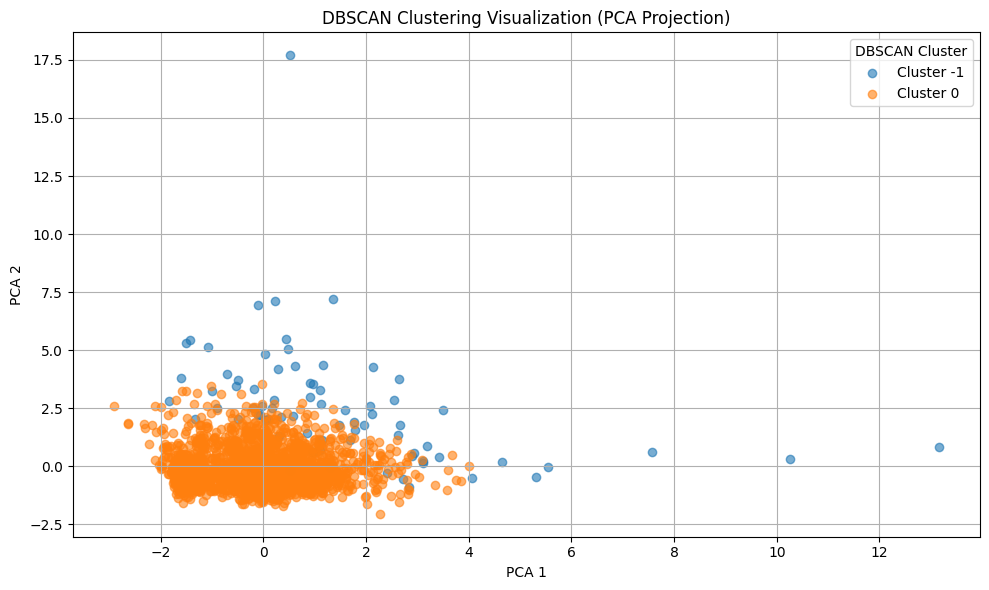

,count
dbscan_cluster,
-1,75
0,1913


In [32]:
#from sklearn.cluster import DBSCAN

# Run DBSCAN on the standardized data
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add DBSCAN cluster labels to the dataframe
X['dbscan_cluster'] = dbscan_labels
X['PCA1'] = X_pca[:, 0]
X['PCA2'] = X_pca[:, 1]

# Count number of clusters and noise points (-1 means noise)
cluster_counts = X['dbscan_cluster'].value_counts().sort_index()

# Plot DBSCAN results using PCA for 2D visualization
plt.figure(figsize=(10, 6))
for label in sorted(X['dbscan_cluster'].unique()):
    subset = X[X['dbscan_cluster'] == label]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {label}', alpha=0.6)

plt.title("DBSCAN Clustering Visualization (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="DBSCAN Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

cluster_counts


# Conclusion:- Characteristics of the Clusters and Compare the Performance of DBSCAN to k-Means.

---



As a bank manager, the combination of K-Means clustering and t-SNE visualization provides more relevant and actionable insights than DBSCAN. K-Means effectively segmented the customer base into clear and interpretable groups, such as high-value older clients, frequently contacted but undecided customers, and younger, less-engaged individuals. These segments align directly with business priorities, enabling more targeted marketing, personalized product offerings, and strategic customer engagement. t-SNE further enhanced this analysis by visually separating the clusters, making it easier to understand customer similarities and differences at a glance. In contrast, DBSCAN identified only one dense cluster and classified many valid customers as outliers, offering limited strategic value for typical banking applications. While DBSCAN excels in anomaly detection, it is less suited for structured customer segmentation. Therefore, K-Means with t-SNE offers a clearer, more practical foundation for data-driven decision-making in banking.

When comparing clustering performance, K-Means delivered clear, well-separated segments and aligned well with the visualizations from both MDS and t-SNE. DBSCAN, while effective for identifying outliers, was less suited to this dataset's structure—it found only one main cluster and labelled many points as noise. This highlights a key limitation of DBSCAN in higher-dimensional, moderately dense data: it is highly sensitive to parameters and may underperform when clusters are not well-defined by density alone. In contrast, K-Means proved more robust and interpretable for segmenting structured customer data in this context.

## Overall Observations

---



As a bank manager, clustering on this dataset helped uncover meaningful customer segments that can directly inform marketing strategies, product offerings, and customer engagement efforts. By applying K-Means clustering to features like age, balance, call duration, campaign frequency, and past contact history.
One cluster consisted of older clients with high balances and longer call durations—likely loyal and financially stable customers who may be ideal candidates for premium banking products or investment services.
Another cluster included middle-aged clients with moderate balances and frequent past contacts, indicating a group that may need more targeted or persistent engagement strategies to convert.
The third cluster revealed younger clients with lower balances and shorter interactions, suggesting a less engaged or newer customer segment that might benefit from onboarding support or introductory offers.

Overall, clustering transformed a large and complex dataset into clear, actionable customer profiles, enabling the bank to deliver more personalized services, optimize outreach, and ultimately improve customer satisfaction and retention.
